# Project application of Big Data

## Data libraries

In [1]:
# standard Python tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import sklearn

# preprocessing steps
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# machine learning models and tools
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import plot_importance

# cross validation and metrics - remember this competition is scored as area under curve
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

## Data import

In [2]:
df_test = pd.read_csv ("C:\\Users\\Emeric\\Desktop\\application_test.csv", sep = ',')
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [3]:
df_train = pd.read_csv ("C:\\Users\\Emeric\\Desktop\\application_train.csv", sep = ',')
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(df_train.shape)
print(df_test.shape)

(307511, 122)
(48744, 121)


## Data cleaning

In [5]:
# what is going on with days_employed? Over 50,000 entries have the value 365,243 days! Let's replace those with NaN and let the imputer deal with them.
df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# ratio features
df_train['CI_ratio'] = df_train['AMT_CREDIT'] / df_train['AMT_INCOME_TOTAL']        # credit-to-income ratio
df_train['AI_ratio'] = df_train['AMT_ANNUITY'] / df_train['AMT_INCOME_TOTAL']       # annuity-to-income ratio
df_train['AC_ratio'] = df_train['AMT_CREDIT'] / df_train['AMT_ANNUITY']             # credit to annuity - basically the term of the loan in years
df_train['CG_ratio'] = df_train['AMT_CREDIT'] / df_train['AMT_GOODS_PRICE']         # credit to goods price ratio - how much was financed?

# log features
df_train['log_INCOME'] = np.log(df_train['AMT_INCOME_TOTAL'])                    # log of income
df_train['log_ANNUITY'] = np.log(df_train['AMT_ANNUITY'])                        # log of annuity
df_train['log_CREDIT'] = np.log(df_train['AMT_CREDIT'])                          # log of credit
df_train['log_GOODS'] = np.log(df_train['AMT_GOODS_PRICE'])                      # log of goods price

# flag features
df_train['MissingBureau'] = df_train.iloc[:, 41:44].isnull().sum(axis=1).astype("category")   # number of bureaus with no score
df_train['FLAG_CG_ratio'] = df_train['AMT_CREDIT'] > df_train['AMT_GOODS_PRICE']                 # FLAG if you borrowed more than the price of the item

# EXT_SOURCE_x variables are very important - let's not leave missing values up to the imputer!
# Instead of imputing missing values by column mean or median, let's fill in missing values by row
# i.e. missing scores are replaced with the average of the scores we do have. If there are no scores at all
# let's just give them a value of 0.2 for now.
df_train['AVG_EXT'] = df_train.iloc[:, 41:44].sum(axis=1)/(3- df_train.iloc[:,41:44].isnull().sum(axis=1))   # average of the (at most) three scores
df_train['AVG_EXT'].replace(np.nan, 0.2, inplace = True)   # get rid of any /0 errors generated from previous step

df_train.EXT_SOURCE_1.fillna(df_train.AVG_EXT, inplace=True)
df_train.EXT_SOURCE_2.fillna(df_train.AVG_EXT, inplace=True)
df_train.EXT_SOURCE_3.fillna(df_train.AVG_EXT, inplace=True)

df_train.drop(['AVG_EXT'], axis = 1)   # let's not make AVG_EXT a feature - it will be too highly correlated to the three components

# drop these variables based on poor feature significance (< 0.0001)
df_train.drop(['REG_REGION_NOT_LIVE_REGION','AMT_REQ_CREDIT_BUREAU_WEEK','HOUSETYPE_MODE','OCCUPATION_TYPE','FLAG_MOBIL','FLAG_CONT_MOBILE',
           'NAME_TYPE_SUITE', 'FLAG_DOCUMENT_4','ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_16',
           'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'AMT_REQ_CREDIT_BUREAU_DAY',
           'AMT_REQ_CREDIT_BUREAU_HOUR', 'FLAG_DOCUMENT_21','FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_2'],
           axis=1, inplace=True)

In [6]:
y = df_train['TARGET'].values
X_train, X_valid, y_train, y_valid = train_test_split(df_train.drop(['TARGET', 'SK_ID_CURR'], axis = 1), y, stratify = y, test_size=0.9, random_state=1)
print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of X_valid:',X_valid.shape)
print('Shape of y_valid:',y_valid.shape)

Shape of X_train: (30751, 104)
Shape of y_train: (30751,)
Shape of X_valid: (276760, 104)
Shape of y_valid: (276760,)


In [7]:
types = np.array([z for z in X_train.dtypes])        # array([dtype('float64'), dtype('float64'), dtype('O'), dtype('O') ...])
all_columns = X_train.columns.values                 # list of all column names
is_num = types != 'object'                           # returns array([False, False, False, False,  True,  True, ...) where True is a numeric variable
num_features = all_columns[is_num].tolist()          # list of all numeric columns
cat_features = all_columns[~is_num].tolist()         # list of all categorical columns

print(len(num_features), "numeric features")
print(len(cat_features), "categorical features")

93 numeric features
11 categorical features


In [8]:
features = num_features + cat_features

Pipe_num = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy = 'median')),        # tried median, mean, constant strategies
    ('scaler', StandardScaler())       ])

Pipe_cat = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'Unknown')),
    ('onehot', OneHotEncoder())        ])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', Pipe_num, num_features),
        ('cat', Pipe_cat, cat_features)])

preprocessor.fit(df_train[features])
X_train = preprocessor.transform(X_train[features])
X_valid = preprocessor.transform(X_valid[features])

print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)

Shape of X_train: (30751, 145)
Shape of y_train: (30751,)


## Random Forest

In [9]:
rf_model = RandomForestClassifier(n_estimators=200, 
                                      min_samples_split=10, 
                                      min_samples_leaf=5, 
                                      n_jobs=-1, 
                                      random_state=42) 
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict_proba(X_valid)[:, 1]


In [10]:
train_probs = rf_model.predict_proba(X_train)[:,1] 
probs = rf_model.predict_proba(X_valid)[:, 1]
train_predictions = rf_model.predict(X_train)

In [11]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_valid, probs)}')

Train ROC AUC Score: 0.9985795067868325
Test ROC AUC  Score: 0.7294675840283456


## XGBoost

In [12]:
Xgb_clf = XGBClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=0)
Xgb_clf.fit(X_train, y_train)
XGB_y_pred = Xgb_clf.predict_proba(X_valid)[:, 1]

C:\Users\Emeric\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [13]:
train_probs = Xgb_clf.predict_proba(X_train)[:,1] 
probs = Xgb_clf.predict_proba(X_valid)[:, 1]
train_predictions = Xgb_clf.predict(X_train)

In [14]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_valid, probs)}')

Train ROC AUC Score: 0.7162712354592459
Test ROC AUC  Score: 0.7181857755420088


## Gradient Boosting

In [15]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train)
gb_y_pred = gb_clf.predict_proba(X_valid)[:, 1]


In [16]:
train_probs = gb_clf.predict_proba(X_train)[:,1] 
probs = gb_clf.predict_proba(X_valid)[:, 1]
train_predictions = gb_clf.predict(X_train)

In [17]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_valid, probs)}')

Train ROC AUC Score: 0.6998795159739248
Test ROC AUC  Score: 0.695642786022521


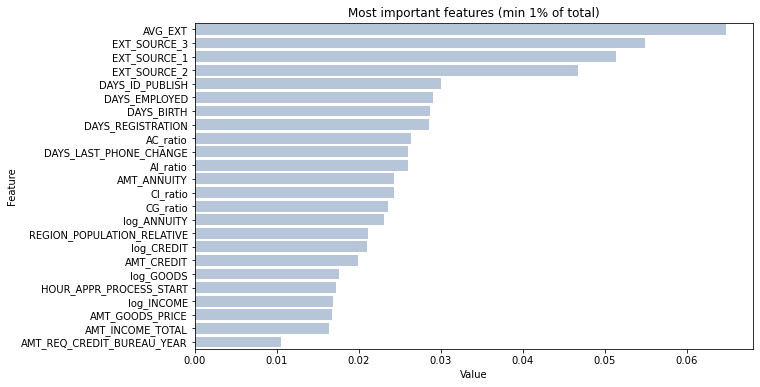

In [18]:
importance_DF = pd.DataFrame(zip(rf_model.feature_importances_, features), columns=['Value','Feature']).sort_values(by="Value", ascending=False)
importance_plot = importance_DF[importance_DF['Value'] > 0.01]
plt.figure(figsize=[10,6])
sns.barplot(importance_plot['Value'], importance_plot['Feature'], orient = "h", color = "lightsteelblue")
plt.title("Most important features (min 1% of total)")
plt.show()

# Shap

In [19]:
import shap
shap.initjs()

In [ ]:
%time shap_values = shap.TreeExplainer(rf_model).shap_values(X_train)


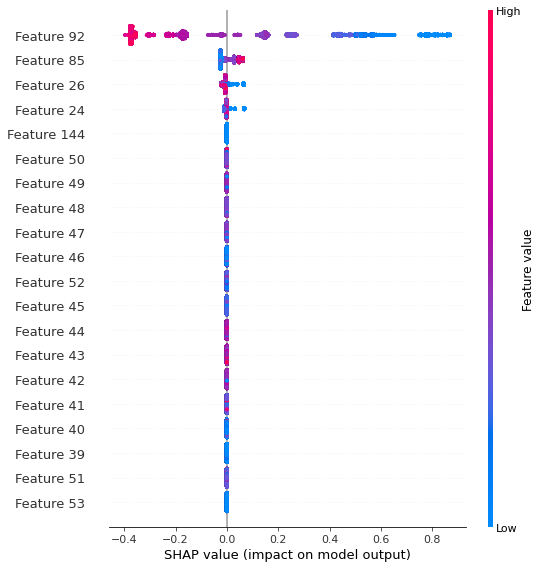

In [21]:
shap.summary_plot(shap_values, X_train)
